# Convolutional Neural Networks
---
As we knew in the disign that we will use "convolutional neural network" and we train a **CNN** to classify images from the our images dataset for three plants  and the diseases of theme for a total of 15 classes.





### Test for CUDA

Since these are larger (32x32x3) images, it may prove useful to speed up your training time by using a GPU. CUDA is a parallel computing platform and CUDA Tensors are the same as typical Tensors, only they utilize GPU's for computation.
this code will test the system to check for CUDA cores and activate it if available.

In [ ]:
import torch
import numpy as np

# check if CUDA is available
train_on_gpu = torch.cuda.is_available()

if not train_on_gpu:
    print('CUDA is not available.  Training on CPU ...')
else:
    print('CUDA is available!  Training on GPU ...')

print(torch.__version__)

CUDA is available!  Training on GPU ...
1.9.0+cu102


---
## Load the Data



this code will:
- load the images of the healthy and not healthy tomattos images into "trainloaders" that stores the images and it's labels.
- decide the batch size.(how make image in each training cycle) 
- the tranform object will:
    - transform the image to "tensor" datatype that pytoch uses.
    - rotate the image romdamly by 10 degrees (to avoid over fiting).
    - flip the image horizontaly rondomly (to avoid over fitting).
    - normalizing the image tensor (from 0 to 1 instead of from 0 to 255).
    - resize the images to 32 by 32.

- We load in the training and test data, split the training data into a training and validation set, then create DataLoaders for each of these sets of data.
-identify the correct class for each folder.

In [ ]:
# you can get the data set from -> https://www.kaggle.com/emmarex/plantdisease
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import os
import torchvision.transforms as transforms
from torchvision import datasets
from PIL import ImageFile

ImageFile.LOAD_TRUNCATED_IMAGES = True

###data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# Declare the transforms for train, valid and test sets.
# Convert to Tensor
# Normalize images because the values of images should be loaded between [0 - 1]
image_size = 36
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
# percentage of training set to use as validation

transforms = {
    
    # RandomHorizontalFlip() & RandomRotation() to augement data in train transformation
    'train' : transforms.Compose([
                    transforms.RandomHorizontalFlip(), # randomly flip and rotate
                    transforms.RandomRotation(10),
                    transforms.Resize(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),

    
    'valid' : transforms.Compose([
                    transforms.RandomHorizontalFlip(), # randomly flip and rotate
                    transforms.RandomRotation(10),
                    transforms.Resize(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
    
    'test' : transforms.Compose([
                    transforms.RandomHorizontalFlip(), # randomly flip and rotate
                    transforms.RandomRotation(10),
                    transforms.Resize(image_size),
                    transforms.ToTensor(),
                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
}

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20

# Create image datasets (train, valid, test)
image_datasets = {x: datasets.ImageFolder(os.path.join('/content/drive/MyDrive/finalModel/output', x), transforms[x])
                 for x in ['train', 'valid', 'test']}

# Create data loaders (train, valid, test)
data_loaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=batch_size,
                                              shuffle=True, num_workers=num_workers)
               for x in ['train', 'valid', 'test']}


In [ ]:
# Check dataset sizes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
num_classes = len(image_datasets['train'].classes)

print('Number of records of training dataset: {}'.format(dataset_sizes['train']))
print('Number of records of validation dataset: {}'.format(dataset_sizes['valid']))
print('Number of records of test dataset: {}'.format(dataset_sizes['test']))
print('Number of classes: {}'.format(num_classes))


Number of records of training dataset: 16504
Number of records of validation dataset: 2058
Number of records of test dataset: 2076
Number of classes: 15


In [ ]:
# Get the all plantes labels
classes = image_datasets['train'].classes
print(classes)

['Pepper__bell___Bacterial_spot', 'Pepper__bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Tomato_Bacterial_spot', 'Tomato_Early_blight', 'Tomato_Late_blight', 'Tomato_Leaf_Mold', 'Tomato_Septoria_leaf_spot', 'Tomato_Spider_mites_Two_spotted_spider_mite', 'Tomato__Target_Spot', 'Tomato__Tomato_YellowLeaf__Curl_Virus', 'Tomato__Tomato_mosaic_virus', 'Tomato_healthy']


### Visualize a Batch of Training Data

this code is just for displaying a batch of image with it's correct label to make sure. the imshow() function takes in the tenson type image and unnormlize it for displaying.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))  # convert from Tensor image

#### we are using the "malplotlib" to display the image from the trainloader:

torch.Size([3, 36, 36])


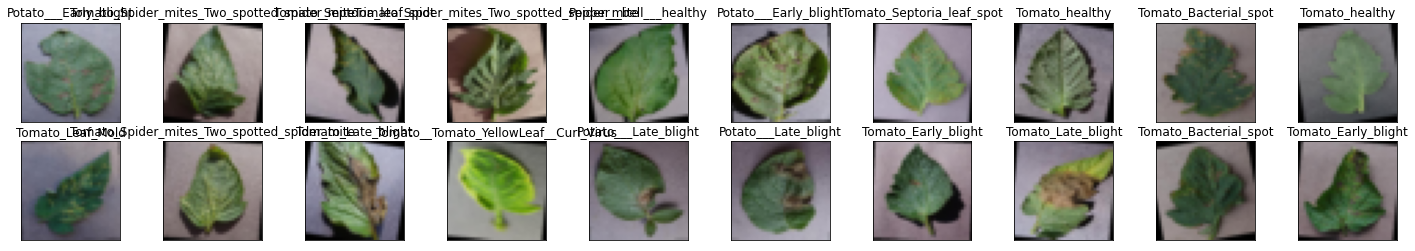

In [ ]:
import numpy as np
# obtain one batch of training images
dataiter = iter(data_loaders['train'])
images, labels = dataiter.next()

from torchvision.utils import save_image

img1 = images[0]
print(img1.size()) #torch.Size([3,28,28]
# img1 = img1.numpy() # TypeError: tensor or list of tensors expected, got <class 'numpy.ndarray'>
save_image(img1, 'img1.png')



images = images.numpy() # convert images to numpy for display



# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
# display 20 images
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images[idx])
    ax.set_title(classes[labels[idx]])


### View an Image in More Detail

Here, we look at the normalized red, green, and blue (RGB) color channels as three separate, grayscale intensity images.using the "malplotlib" as well.

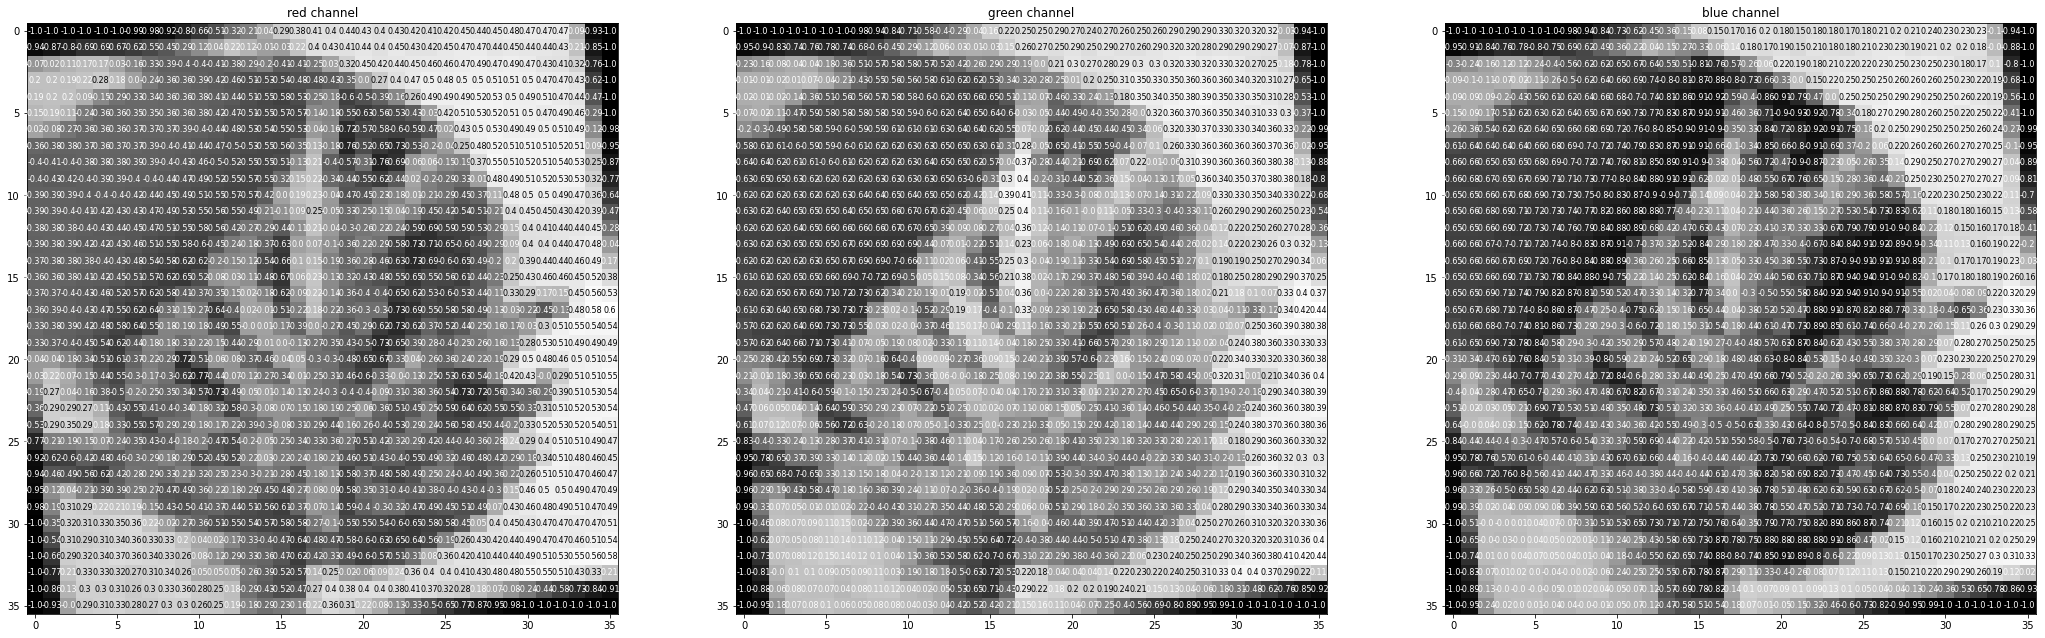

In [ ]:
rgb_img = np.squeeze(images[3])
channels = ['red channel', 'green channel', 'blue channel']

fig = plt.figure(figsize = (36, 36)) 
for idx in np.arange(rgb_img.shape[0]):
    ax = fig.add_subplot(1, 3, idx + 1)
    img = rgb_img[idx]
    ax.imshow(img, cmap='gray')
    ax.set_title(channels[idx])
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            val = round(img[x][y],2) if img[x][y] !=0 else 0
            ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center', size=8,
                    color='white' if img[x][y]<thresh else 'black')

---
## Define the Network Architecture
This time, you'll define a CNN architecture. 
* [Convolutional layers, which can be thought of as stack of filtered images.
* [Maxpooling layers], which reduce the x-y size of an input, keeping only the most _active_ pixels from the previous layer.
* The usual Linear + Dropout layers to avoid overfitting and produce a 10-dim output.

A network with 2 convolutional layers is shown in the image below and in the code, and you've been given starter code with one convolutional and one maxpooling layer.



#### the class will: Define a model with multiple convolutional layers, and define the feedforward metwork behavior.

The more convolutional layers you include, the more complex patterns in color and shape a model can detect. The final model include 3 convolutional layers as well as linear layers + dropout in between to avoid overfitting. 






### Convolutional Layers in PyTorch

To create a convolutional layer in PyTorch,we imported the necessary module:

import torch.nn as nn

Then, there is a two part process to defining a convolutional layer and defining the feedforward behavior of a model (how an input moves through the layers of a network). First, you must define a Model class and fill in two functions.

#### the 1st is (init):

we defined a convolutional layer in the __init__ function of by using the following format:

self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0)
forward

#### Then, we refered to that layer in the forward function! Here, I am passing in an input image x and applying a ReLU function to the output of this layer.

x = F.relu(self.conv1(x))

You must pass the following arguments:

- in_channels - The number of inputs (in depth), 3 for an RGB image, for example.
- out_channels - The number of output channels, i.e. the number of filtered "images" a convolutional layer is made of or the number of unique, convolutional kernels that will be applied to an input.
- kernel_size - Number specifying both the height and width of the (square) convolutional kernel.

There are some additional, optional arguments that you might like to tune:

- stride - The stride of the convolution. If you don't specify anything, stride is set to 1.
- padding - The border of 0's around an input array. If you don't specify anything, padding is set to 0.

#### Pooling Layers
Pooling layers take in a kernel_size and a stride. Typically the same value as is the down-sampling factor. 

#### forward

Here, we see that poling layer being applied in the forward function.

x = F.relu(self.conv1(x))
x = self.pool(x)

#### flattening
Part of completing a CNN architecture, is to flatten the eventual output of a series of convolutional and pooling layers, so that all parameters can be seen (as a vector) by a linear classification layer.


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # convolutional layer (sees 32x32x3 image tensor)
        self.conv1 = nn.Conv2d(3, 16, 3, padding=1)
        # convolutional layer (sees 16x16x16 tensor)
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1)
        # convolutional layer (sees 8x8x32 tensor)
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1)
        # max pooling layer
        self.pool = nn.MaxPool2d(2, 2)
        # linear layer (64 * 4 * 4 -> 500)
        self.fc1 = nn.Linear(64 * 4 * 4, 500)
        # linear layer (500 -> 10)
        self.fc2 = nn.Linear(500, 15)
        # dropout layer (p=0.25)
        self.dropout = nn.Dropout(0.25)

    def forward(self, x):
        # add sequence of convolutional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(-1, 64 * 4 * 4)
        # add dropout layer
        x = self.dropout(x)
        # add 1st hidden layer, with relu activation function
        x = F.relu(self.fc1(x))
        # add dropout layer
        x = self.dropout(x)
        # add 2nd hidden layer, with relu activation function
        x = self.fc2(x)
        return x

# create a complete CNN
model = Net()
print(model)



Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=1024, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=15, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
)


### Specify [Loss Function] and [Optimizer]

Here we Decided on a loss and optimization function and on a acceptable learning rate.
we use the cross entropy loss for the loss function.
nn.CrossEntropyLoss() :This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.



In [ ]:
import torch.optim as optim

# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = optim.SGD(model.parameters(), lr=0.01)

---
## Train the Network

here we are looking at how the training and validation loss decreases over time; if the validation loss ever increases it indicates possible overfitting.



In [ ]:
# number of epochs to train the model
n_epochs = 30

valid_loss_min = np.Inf # track change in validation loss

for epoch in range(1, n_epochs+1):

    # keep track of training and validation loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train()
    for data, target in data_loaders['train']:
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
        
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        
        output = model(data)
        # calculate the batch loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update training loss
        train_loss += loss.item()*data.size(0)
        
    ######################    
    # validate the model #
    ######################
    model.eval()
    for data, target in data_loaders['valid'] :
        # move tensors to GPU if CUDA is available
        if train_on_gpu:
            data, target = data.cuda(), target.cuda()
            model.cuda()
            

        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        
        # calculate the batch loss
        loss = criterion(output, target)
        
        # update average validation loss 
        valid_loss += loss.item()*data.size(0)
    
    # calculate average losses
    train_loss = train_loss/len( data_loaders['train'].sampler)
    valid_loss = valid_loss/len( data_loaders['valid'].sampler)
        
    # print training/validation statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    
    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model_cifar.pt')
        valid_loss_min = valid_loss

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


Epoch: 1 	Training Loss: 2.574731 	Validation Loss: 2.456703
Validation loss decreased (inf --> 2.456703).  Saving model ...
Epoch: 2 	Training Loss: 2.186745 	Validation Loss: 2.842878
Epoch: 3 	Training Loss: 1.780117 	Validation Loss: 1.609434
Validation loss decreased (2.456703 --> 1.609434).  Saving model ...
Epoch: 4 	Training Loss: 1.480022 	Validation Loss: 1.343957
Validation loss decreased (1.609434 --> 1.343957).  Saving model ...
Epoch: 5 	Training Loss: 1.245765 	Validation Loss: 1.346224
Epoch: 6 	Training Loss: 1.068121 	Validation Loss: 1.269499
Validation loss decreased (1.343957 --> 1.269499).  Saving model ...
Epoch: 7 	Training Loss: 0.927991 	Validation Loss: 1.367927
Epoch: 8 	Training Loss: 0.814888 	Validation Loss: 0.742305
Validation loss decreased (1.269499 --> 0.742305).  Saving model ...
Epoch: 9 	Training Loss: 0.706996 	Validation Loss: 0.762578
Epoch: 10 	Training Loss: 0.627840 	Validation Loss: 0.766727
Epoch: 11 	Training Loss: 0.566674 	Validation Lo

###  Load the Model with the Lowest Validation Loss

In [ ]:
model.load_state_dict(torch.load('model_cifar.pt'))

<All keys matched successfully>

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

mobile_model = model
mobile_model.eval()

def get_l_tofuse():
  return [['conv1', 'conv2' ,'conv3' ,'pool', 'fc1', 'fc2', 'dropout']]

layers = get_l_tofuse()

f = torch.quantization.fuse_modules(mobile_model,layers,inplace= False)
types_to_quantize = {torch.nn.conv2d, torch.nn.MaxPool2d,torch.nn.Dropout,torch.nn.ReLU}
q = torch.uantization.quantize_dynamic(f, types_to_quantize,dtype = torch.qint8)

s = torch.jit.script(q)
torch.jit.save(s, 'optmodel.pt')

AssertionError: ignored

## creating the moblie model

In [ ]:
mobile_model = model
mobile_model.eval()
input_tensor = torch.rand(1,3, 224, 224)

script_model = torch.jit.trace(mobile_model,input_tensor)
script_model.save("mobilenet.pt")

---
## Test the Trained Network

here we test our trained model on previously unseen data! A "good" result will be a CNN that gets around 70% .

In [ ]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(15))
class_total = list(0. for i in range(15))


model.eval()
# iterate over test data
for data, target in  data_loaders['test']:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
        model.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)


In [ ]:
# track test loss
test_loss = 0.0
class_correct = list(0. for i in range(15))
class_total = list(0. for i in range(15))


model.eval()
# iterate over test data
for data, target in  data_loaders['test']:
    # move tensors to GPU if CUDA is available
    if train_on_gpu:
        data, target = data.cuda(), target.cuda()
        model.cuda()
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the batch loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)    
    # compare predictions to true label
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    # calculate test accuracy for each object class
    
    for i in range(16):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# average test loss
test_loss = test_loss/len(data_loaders['test'].dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(15):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            classes[i], 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.262056

Test Accuracy of Pepper__bell___Bacterial_spot: 97% (78/80)
Test Accuracy of Pepper__bell___healthy: 96% (118/122)
Test Accuracy of Potato___Early_blight: 100% (77/77)
Test Accuracy of Potato___Late_blight: 87% (68/78)
Test Accuracy of Potato___healthy: 91% (11/12)
Test Accuracy of Tomato_Bacterial_spot: 94% (168/178)
Test Accuracy of Tomato_Early_blight: 82% (64/78)
Test Accuracy of Tomato_Late_blight: 89% (136/152)
Test Accuracy of Tomato_Leaf_Mold: 93% (67/72)
Test Accuracy of Tomato_Septoria_leaf_spot: 90% (136/150)
Test Accuracy of Tomato_Spider_mites_Two_spotted_spider_mite: 89% (127/142)
Test Accuracy of Tomato__Target_Spot: 89% (103/115)
Test Accuracy of Tomato__Tomato_YellowLeaf__Curl_Virus: 100% (255/255)
Test Accuracy of Tomato__Tomato_mosaic_virus: 100% (27/27)
Test Accuracy of Tomato_healthy: 98% (124/126)

Test Accuracy (Overall): 93% (1559/1664)


### Visualize Sample Test Results

torch.Size([20, 3, 36, 36])


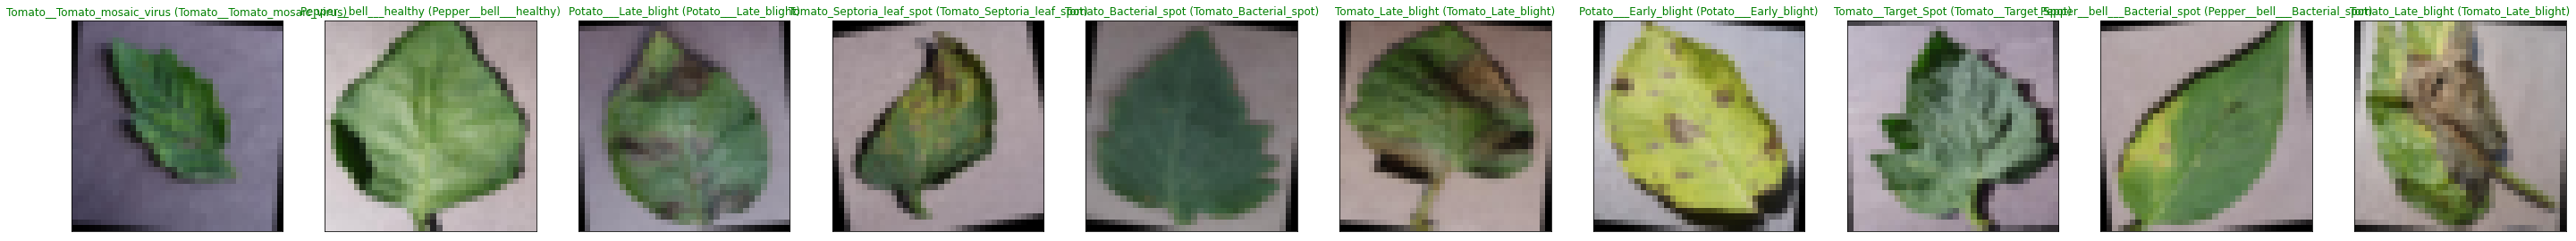

In [ ]:
# obtain one batch of test images
dataiter = iter(data_loaders['test'])
images, labels = dataiter.next()


images.numpy()

print(images.shape)

# move model inputs to cuda, if GPU available
if train_on_gpu:
    images = images.cuda()

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds_tensor = torch.max(output, 1)
preds = np.squeeze(preds_tensor.numpy()) if not train_on_gpu else np.squeeze(preds_tensor.cpu().numpy())

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(50, 40))
for idx in np.arange(10):
    ax = fig.add_subplot(4, 20/2, idx+1, xticks=[], yticks=[])
    imshow(images.cpu()[idx])
    ax.set_title("{} ({})".format(classes[preds[idx]], classes[labels[idx]]),
                 color=("green" if preds[idx]==labels[idx].item() else "red"))